**Integrantes:**

García Mejía, Martina

Becerra Ahumada, Juan Camilo

Navas González, Juan Camilo

Niño Bernal, Carlos Felipe

### Importando paquetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Haciendo cálculos

Importamos los datos del archivo y graficamos:

In [2]:
data = np.genfromtxt("datos-carro-1d.csv", delimiter=',', missing_values=np.nan, skip_header=5) # Importación de datos

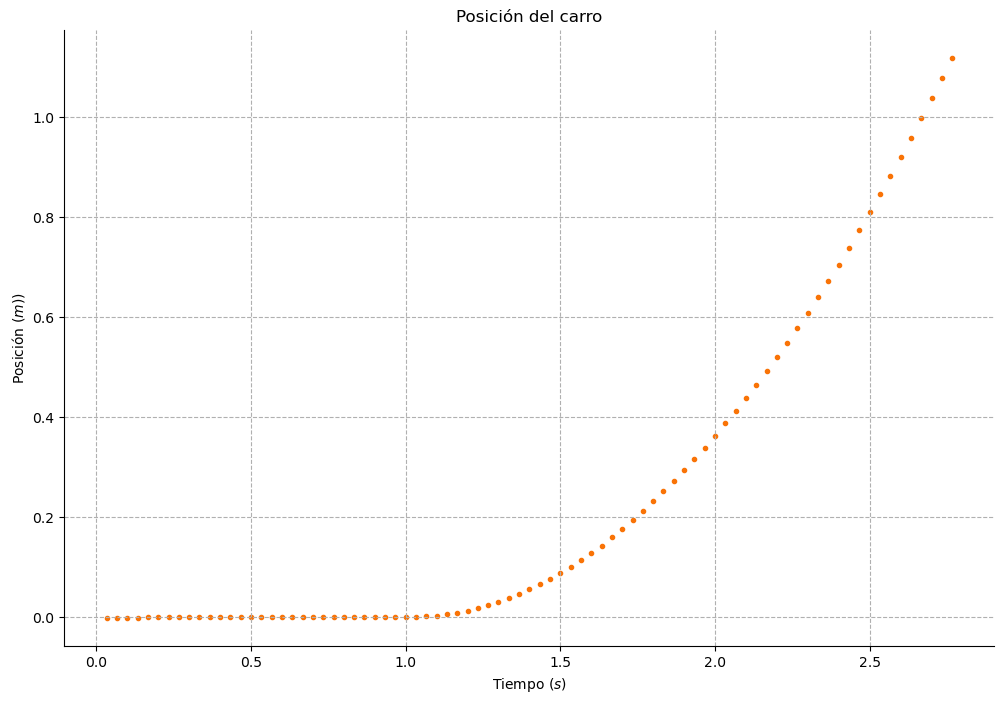

In [3]:
#   Gráfica de movimiento en x

plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], color="xkcd:orange", marker='.', label="Altura máxima (m)")
plt.xlabel("Tiempo $(s)$")
plt.ylabel("Posición $(m))$")
plt.title("Posición del carro")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
plt.show()

In [4]:
#   Filtrando los datos a partir del momento de inicio del movimiento

filtered_data = data[-(data[:,1][data[:,1]>0.004]).shape[0]:]   # Nuevo array con datos filtrados
#   La condición de filtrado es que x > 0.004 (el movimiento inicie), 
#   luego se hace una nueva lista (array) de la cantidad n de números que cumplen esa función, 
#   seleccionando de último a primero en la lista original [-n:], pues el carro no desacelera al final.

print(f"Inicio del movimiento: {filtered_data[0:1,0][0]:.3f}s")

Inicio del movimiento: 1.133s


El movimiento comienza aproximadamente en $t_{0}=1.13s$.

Ahora realizamos la regresión no lineal y graficamos:

In [5]:
def fitfunc(t,x0,v0,a): # Función a ajustar
    return x0 + v0*t + 0.5*a*(t**2)

param = curve_fit(fitfunc, filtered_data[:,0], filtered_data[:,1])[0]   # Cálculo de parámetros del ajuste

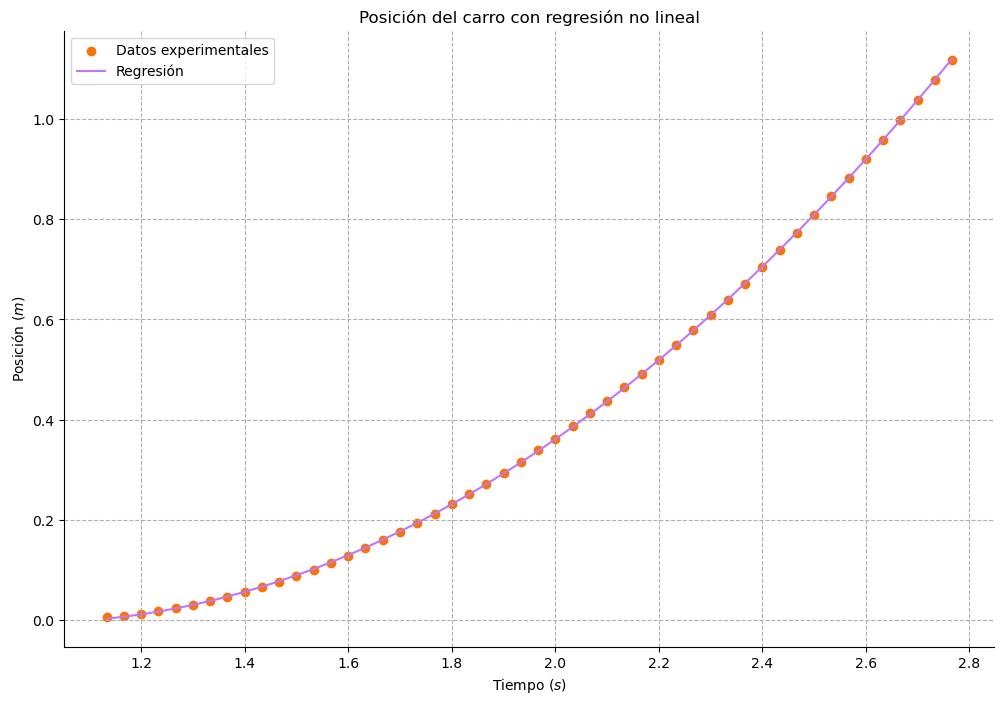

In [6]:
#   Gráfica del ajuste con los datos

plt.figure(figsize=(12,8))
plt.scatter(filtered_data[:,0], filtered_data[:,1], color="xkcd:orange", marker='o', label="Datos experimentales")
plt.plot(filtered_data[:,0], fitfunc(filtered_data[:,0], *param), color="xkcd:light purple", label="Regresión")
plt.xlabel("Tiempo $(s)$")
plt.ylabel("Posición $(m)$")
plt.title("Posición del carro con regresión no lineal")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
plt.legend()
plt.show()

Comparemos con las derivadas numéricas calculadas por Tracker:

In [10]:
#   Filtrando los datos np.nan para calcular el promedio de aceleración por derivación numérica

a_num = filtered_data[[not i for i in np.isnan(filtered_data[:,5])]][:,5] # Nuevo array sólo con aceleraciones, omitiendo los datos np.nan
#   Condición de filtrado: dato no es np.nan. No importa la posición (se conserva), sólo su valor

a_avg = np.average(a_num)  # Promedio de la aceleración por derivación numérica

print(f"El valor de a_x numérico promedio es {a_avg:.3f}m/s^2")
print(f"El valor de a_x de la regresión es {param[2]:.3f}m/s^2")
print(f"La diferencia porcentual es {100*(-param[2]+a_avg)/(param[2]+a_avg):.3f}%")

El valor de a_x numérico promedio es 0.708m/s^2
El valor de a_x de la regresión es 0.706m/s^2
La diferencia porcentual es 0.106%


Tenemos que la diferencia porcentual entre ambos valores es $0.106\%$

### Notas adicionales

Probamos dos métodos para filtrar datos: uno más simple y versátil (permite filtrado en cualquier posición) y uno más rápido (se omiten sólo los datos en las primeras posiciones). Ambos fueron usados y es posible utilizar sólo uno de ellos para resolver el problema. A continuación dejamos el comparativo entre ambos haciendo la misma operación:

In [8]:
%%timeit    # El método utilizado para determinar el inicio del movimiento. Omite los primeros datos
fil1 = data[-(data[:,1][data[:,1]>0.004]).shape[0]:]

2.32 µs ± 95.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%%timeit    # Este método se utilizó para excluir los datos np.nan del promedio calculado. Omite datos en cualquier posición.
fil1 = data[data[:,1] > 0.004]

4.85 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
